In [36]:
import findspark
findspark.init()

In [37]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame dengan kolom tambahan
data = [
    ("Ali", 34, "Insinyur", "Bersepeda", "Laki-laki"),
    ("Budi", 23, "Desainer", "Fotografi", "Laki-laki"),
    ("Citra", 29, "Dokter", "Membaca", "Perempuan"),
    ("Dina", 45, "Guru", "Berkebun", "Perempuan")
]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


+-----+----+---------+---------+---------+
| Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-----+----+---------+---------+---------+
|  Ali|  34| Insinyur|Bersepeda|Laki-laki|
| Budi|  23| Desainer|Fotografi|Laki-laki|
|Citra|  29|   Dokter|  Membaca|Perempuan|
| Dina|  45|     Guru| Berkebun|Perempuan|
+-----+----+---------+---------+---------+



In [38]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [
    ("Ali", 34, "Insinyur", "Bersepeda", "Laki-laki"),
    ("Budi", 23, "Desainer", "Fotografi", "Laki-laki"),
    ("Citra", 29, "Dokter", "Membaca", "Perempuan"),
    ("Dina", 45, "Guru", "Berkebun", "Perempuan")
]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()


+-----+----+---------+---------+---------+
| Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-----+----+---------+---------+---------+
|  Ali|  34| Insinyur|Bersepeda|Laki-laki|
| Budi|  23| Desainer|Fotografi|Laki-laki|
|Citra|  29|   Dokter|  Membaca|Perempuan|
| Dina|  45|     Guru| Berkebun|Perempuan|
+-----+----+---------+---------+---------+

+----+----+---------+---------+---------+
|Nama|Usia|Pekerjaan|     Hobi|   Gender|
+----+----+---------+---------+---------+
| Ali|  34| Insinyur|Bersepeda|Laki-laki|
|Dina|  45|     Guru| Berkebun|Perempuan|
+----+----+---------+---------+---------+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+---------+---------+---------+
| Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-----+----+---------+---------+---------+
| Dina|  45|     Guru| Berkebun|Perempuan|
|  Ali|  34| Insinyur|Bersepeda|Laki-laki|
|Citra|  29|   Dokter|  Membaca|Perempuan|
| Budi|  23| Desainer|Fotografi|Laki-laki|
+-----+----+---------+---------+--------

In [39]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Menambahkan kolom baru
df_pandas["Pekerjaan"] = ["Insinyur", "Desainer", "Dokter", "Guru"]
df_pandas["Hobi"] = ["Bersepeda", "Fotografi", "Membaca", "Berkebun"]
df_pandas["Gender"] = ["Laki-laki", "Laki-laki", "Perempuan", "Perempuan"]

# Menampilkan DataFrame yang telah dimodifikasi
print("DataFrame setelah penambahan kolom:")
print(df_pandas)

# Filtering data berdasarkan usia
df_filtered = df_pandas[df_pandas['Usia'] > 30]

# Menampilkan DataFrame hasil filter
print("\nDataFrame setelah filter usia > 30:")
print(df_filtered)


DataFrame setelah penambahan kolom:
    Nama  Usia Pekerjaan       Hobi     Gender
0    Ali    34  Insinyur  Bersepeda  Laki-laki
1   Budi    23  Desainer  Fotografi  Laki-laki
2  Citra    29    Dokter    Membaca  Perempuan
3   Dina    45      Guru   Berkebun  Perempuan

DataFrame setelah filter usia > 30:
   Nama  Usia Pekerjaan       Hobi     Gender
0   Ali    34  Insinyur  Bersepeda  Laki-laki
3  Dina    45      Guru   Berkebun  Perempuan


DataFrame Gabungan:
    Nama  Usia Pekerjaan
0    Ali    34  Insinyur
1   Budi    23  Desainer
2  Citra    29    Dokter
3   Dina    45      Guru

Statistik Deskriptif DataFrame Awal:
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


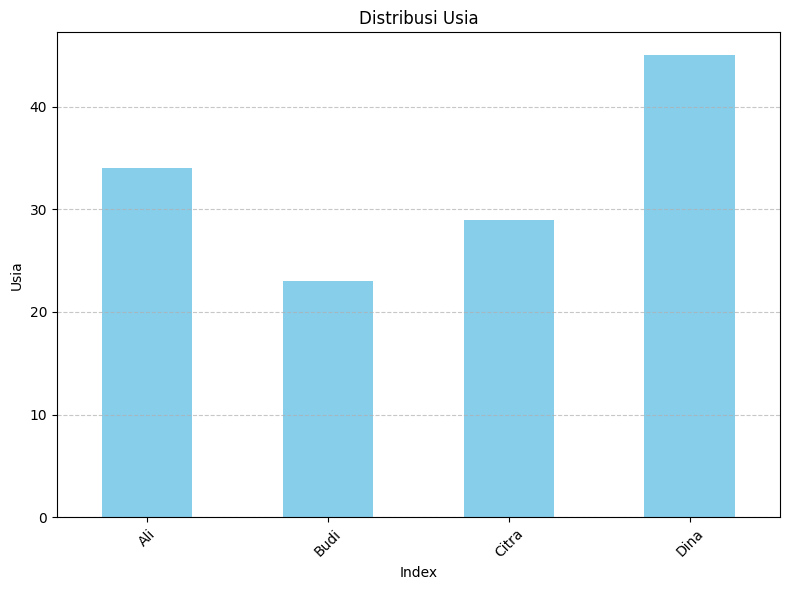

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat DataFrame pertama
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Insinyur", "Desainer", "Dokter", "Guru"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Menggabungkan dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")

# Menampilkan DataFrame gabungan
print("DataFrame Gabungan:")
print(df_joined)

# Menghitung dan menampilkan statistik deskriptif dari DataFrame awal
print("\nStatistik Deskriptif DataFrame Awal:")
print(df_pandas.describe())

# Visualisasi data usia
plt.figure(figsize=(8, 6))
df_pandas['Usia'].plot(kind='bar', color='skyblue')
plt.title('Distribusi Usia')
plt.xlabel('Index')
plt.ylabel('Usia')
plt.xticks(range(len(df_pandas['Usia'])), df_pandas['Nama'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [41]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pandas as pd

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame PySpark
data_spark = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns_spark = ["Nama", "Usia"]
df_spark = spark.createDataFrame(data_spark, columns_spark)

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Insinyur", "Desainer", "Dokter", "Guru"]}
df_pandas = pd.DataFrame(data_pandas)

# Mengonversi DataFrame PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

# Mengonversi DataFrame Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menggabungkan DataFrame Pandas dari Spark dengan DataFrame PySpark yang dikonversi dari Pandas
df_joined = pd.merge(df_pandas_from_spark, df_pandas, on="Nama")

# Mengonversi DataFrame gabungan ke PySpark
df_joined_spark = spark.createDataFrame(df_joined)

# Menampilkan DataFrame gabungan
print("DataFrame Gabungan:")
df_joined_spark.show()

# Menghitung rata-rata usia menggunakan DataFrame PySpark
from pyspark.sql.functions import avg
df_joined_spark.groupBy().agg(avg("Usia")).show()


DataFrame Gabungan:
+-----+----+---------+
| Nama|Usia|Pekerjaan|
+-----+----+---------+
|  Ali|  34| Insinyur|
| Budi|  23| Desainer|
|Citra|  29|   Dokter|
| Dina|  45|     Guru|
+-----+----+---------+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+



In [42]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.functions import max

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame PySpark
data_spark = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns_spark = ["Nama", "Usia"]
df_spark = spark.createDataFrame(data_spark, columns_spark)

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Insinyur", "Desainer", "Dokter", "Guru"]}
df_pandas = pd.DataFrame(data_pandas)

# Mengonversi DataFrame PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

# Menggabungkan DataFrame Pandas dari Spark dengan DataFrame Pandas
df_combined = pd.merge(df_pandas_from_spark, df_pandas, on="Nama")

# Mengonversi DataFrame gabungan ke PySpark
df_combined_spark = spark.createDataFrame(df_combined)

# Menampilkan DataFrame gabungan
print("DataFrame Gabungan:")
df_combined_spark.show()

# Menghitung nilai maksimum usia
print("Nilai Maksimum Usia:")
df_combined_spark.agg(max("Usia")).show()


DataFrame Gabungan:
+-----+----+---------+
| Nama|Usia|Pekerjaan|
+-----+----+---------+
|  Ali|  34| Insinyur|
| Budi|  23| Desainer|
|Citra|  29|   Dokter|
| Dina|  45|     Guru|
+-----+----+---------+

Nilai Maksimum Usia:
+---------+
|max(Usia)|
+---------+
|       45|
+---------+

